In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_csv("data.csv")

data.drop(["Unnamed: 32"],axis=1,inplace=True)
data.drop(["id"],axis=1,inplace=True)

data.diagnosis.replace({"M":1,"B":0},inplace=True)
y=data.diagnosis.values
X=data.drop(["diagnosis"],axis=1)


X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=44)

In [4]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=7)
Model.fit(X_train,y_train)

y_pred = Model.predict(X_test)

In [7]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [8]:
sınıflandırmaRaporu= classification_report(y_test,y_pred)
print(sınıflandırmaRaporu)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [9]:
dogrulukDeğeri = accuracy_score(y_pred,y_test)
print(dogrulukDeğeri)

0.9649122807017544


In [10]:
hataMatrisi = confusion_matrix(y_test,y_pred)
print(hataMatrisi)

[[105   3]
 [  3  60]]


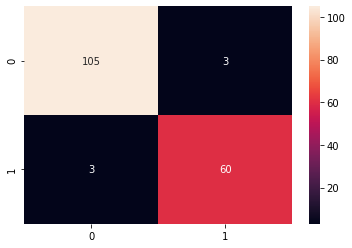

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(hataMatrisi, annot=True, fmt='.0f')
plt.show()